In [17]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import allantools

path = '../AV_Matlab_SW_IEEECSM/parsed_isolated_marble_data_az.mat'
print(f"Loading data from {path}"  )
data = sio.loadmat(path)
acc_z = data['acc_z']
print(f"acc_z shape: {acc_z.shape}")

# Calculate Allan deviation for the IMU data
vals = np.arange(1, 10, dtype=float)  # Create an array of values from 1 to 9
# Define the time intervals for Allan deviation
taus = np.concatenate([0.01*vals, 0.1*vals, vals, 10*vals, 100*vals])  # Concatenate to create a range of taus
#print(f"taus = {taus}")
Fs = 100  # Sampling frequency in Hz
tau, adev, adeverr, n = allantools.oadev(acc_z, rate=Fs, data_type='freq', taus=taus)
asd = np.sqrt(adev)  # Convert Allan deviation to Allan standard deviation (ASD)

Loading data from ../AV_Matlab_SW_IEEECSM/parsed_isolated_marble_data_az.mat
acc_z shape: (3634111, 1)


(0.0001, 0.1)

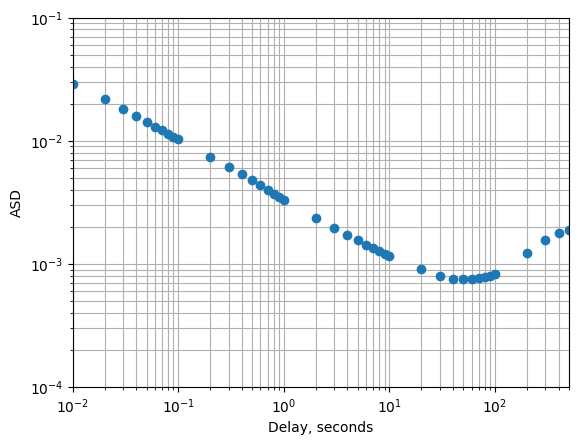

In [ ]:

fig = plt.loglog(tau, adev, 'o', label='Allan Deviation')
#print(f"tau = {tau}, \nadev = {adev}, \nadeverr = {adeverr}, \nn = {n}")
plt.xlabel('Delay, seconds')
plt.ylabel('ASD, m/s^2')
plt.minorticks_on()
plt.grid(which='both', axis='both')
plt.xlim(left=1e-2, right=5e2)
plt.ylim(bottom=1e-4, top=1e-1)